*Authors:* Ismael Mendoza, Andrii Torchylo

In this tutorial we show how to use the `RandomSquareSampling` sampling function to generate galaxy scenes from the input `catsim` catalog.

These images use the realistic spatial distribution of galaxies from the `catsim` catalog.

# Setup

In [ ]:
%matplotlib inline
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt

In [ ]:
import btk
import btk.survey
import btk.draw_blends
import btk.catalog
import btk.sampling_functions

# Create drawing generator

In [ ]:
seed = 0
stamp_size = 24
max_number = 40

catalog = btk.catalog.CatsimCatalog.from_file('../data/input_catalog.fits')
sampling_function = btk.sampling_functions.RandomSquareSampling(
    max_number=max_number, 
    stamp_size=stamp_size, 
    min_mag = 0, 
    max_mag = 26,
    seed = seed)
    
LSST = btk.survey.get_surveys('LSST')

batch_size = 1

draw_generator = btk.draw_blends.CatsimGenerator(
    catalog,
    sampling_function,
    LSST,
    batch_size=batch_size,
    stamp_size=stamp_size,
    njobs=1,
    add_noise="all",
    seed=seed, # use same seed here
)

# Draw scenes in RGB

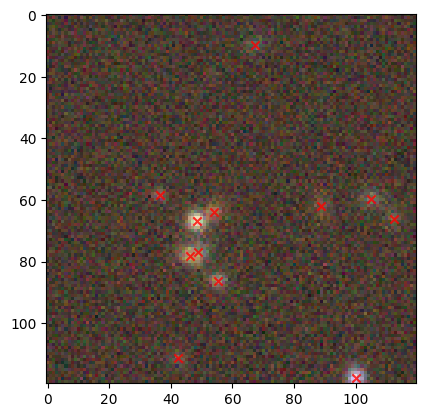

In [ ]:
from btk.plotting import get_rgb

b = next(draw_generator)

im = b.blend_images[0]
bands = [1, 2, 3] # g, r, i 
rgb = get_rgb(im[bands])

plt.imshow(rgb)
plt.scatter(b.catalog_list[0]["x_peak"], 
            b.catalog_list[0]["y_peak"], c="r", marker="x", alpha=0.8)